In [18]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from matplotlib import colors as mcolors

# Plot parameters
plt.rcParams.update({
    'lines.linewidth': 2,     # linewidth
    'text.usetex': True,      # LaTeX font
    'font.family': 'sans serif',   # Serif family
    'font.size': 20,          # font size
    'axes.titlesize': 24,     # title size
    'axes.grid': True,        # grid
    'grid.linestyle': "-.",   # grid style
})

In [33]:
# Physical parameters
P_in = 58808 * 10e-3

# Data
data = pd.read_csv('temperatures_squeezing.csv') 
temperature = data['Degrees'].values  # Temperarure  [ºC]
power = data['Mean'].values            # Power       [mW]

The Second Harmonic Generation (SHG) depends expliclty of the temperature. In particular, we know that
$$
P_{\mathrm{SHG}} \propto P_{\mathrm{in}} A \mathrm{sinc}^2[b (t - t_{0})],
$$

where $P_{\mathrm{in}}$, in our case, is the mean power measured in the lab, $A$ is the amplitude, $b$ a scaling factor, and $t_{0}$ is the optimal phase matching temperature. The parameter $P_{\mathrm{in}}$ is known, and the parameters $A$, $b$, and $t_{0}$ are found through a curve fitting process.

In [38]:
def sinc_square(x, a, b, t0):
    """ 
    'a' and 'b' are arbitrary constants; t0 is the Optimal phase matching temperature
    """
    α = b * (x - t0)
    α = np.where(α == 0, 1e-9, α)  # Avoid division by zero
    return P_in * a * (np.sin(α) ** 2) / (α ** 2)

# Curve fitting
initial_guess = [0.15, 1, 40] # Initial guesses for [a, b, t0]
params, covariance = curve_fit(sinc_square, temperature, power, p0 = initial_guess)
a_fit, b_fit, t_fit = params
print(f"Fitted Parameters: A = {a_fit}, b = {b_fit}, T = {t_fit}")

Fitted Parameters: A = 0.14319885083854406, b = 0.9565745812923558, T = 40.534783876818445


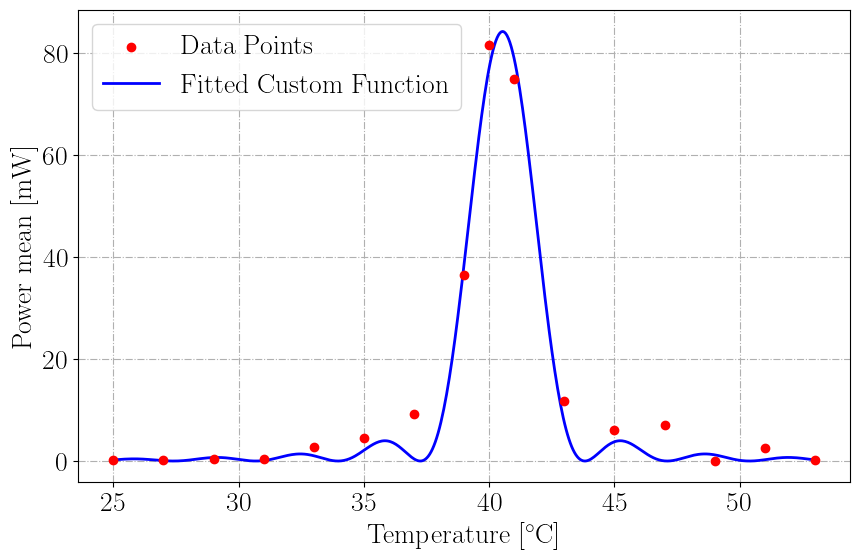

In [ ]:
# Plot
temperature_fit = np.linspace(min(temperature), max(temperature), 500) 
power_fit = sinc_square(temperature_fit, a_fit, b_fit, t_fit)

plt.figure(figsize = (9, 6))
plt.scatter(temperature, power, label = r'Data Points', color = 'red', zorder = 5)
plt.plot(temperature_fit, power_fit, label = r'Fitted Custom Function', color = 'blue')
plt.xlabel(r'Temperature $[{}^{\circ}\mathrm{C}]$')
plt.ylabel(r'Power mean $[\mathrm{mW}]$')
plt.legend()
plt.tight_layout()
plt.savefig("fit.pdf")
plt.show()